# Gantt chart

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.dates
from matplotlib.dates import MONTHLY, DateFormatter, rrulewrapper, RRuleLocator
from pylab import *

In [2]:
def create_date(month,year): #creates the date
    date = dt.datetime(int(year), int(month), 1)
    mdate = matplotlib.dates.date2num(date)
    return mdate

## Data

In [3]:
pos = arange(0.5,5.5,0.5)

ylabels = []
ylabels.append('Identify processes')
ylabels.append('Identify people')
ylabels.append('Create process models')
ylabels.append('Create documents')
ylabels.append('Create operational definitions')
ylabels.append('Create analytics')
ylabels.append('Manage processes')
ylabels.append('task8')
 
effort = []
effort.append([0.2, 1.0])
effort.append([0.2, 1.0])
effort.append([0.2, 1.0])
effort.append([0.3, 0.75])
effort.append([0.25, 0.75])
effort.append([0.3, 0.75])
effort.append([0.5, 0.5])
effort.append([0.7, 0.4])
 
customDates = []
customDates.append([create_date(5,2014),create_date(6,2014)])
customDates.append([create_date(6,2014),create_date(8,2014),create_date(8,2014)])
customDates.append([create_date(7,2014),create_date(9,2014),create_date(9,2014)])
customDates.append([create_date(10,2014),create_date(3,2015),create_date(3,2015)])
customDates.append([create_date(2,2015),create_date(6,2015),create_date(6,2015)])
customDates.append([create_date(5,2015),create_date(6,2015),create_date(6,2015)])
customDates.append([create_date(6,2015),create_date(7,2015),create_date(7,2015)])
customDates.append([create_date(4,2015),create_date(8,2015),create_date(8,2015)])
 
task_dates = {}
for i,task in enumerate(ylabels):
    task_dates[task] = customDates[i]
    task_dates['Climatology'] = [create_date(5,2014),create_date(6,2014),create_date(10,2013)]
    task_dates['Structure'] = [create_date(10,2013),create_date(3,2014),create_date(5,2014)]
    task_dates['Impacts'] = [create_date(5,2014),create_date(12,2014),create_date(2,2015)]
    task_dates['Thesis'] = [create_date(2,2015),create_date(5,2015)]
 


# Plot

In [4]:
fig = plt.figure()
# ax = fig.add_axes([0.15,0.2,0.75,0.3]) #[left,bottom,width,height]
ax = fig.add_subplot(111)

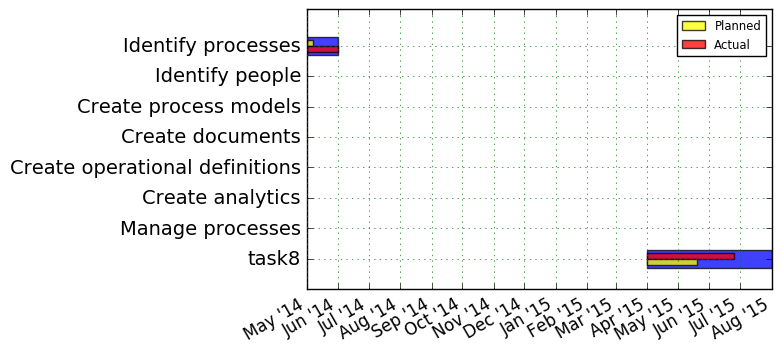

In [5]:
#plot the data
start_date,end_date = task_dates[ylabels[0]]
ax.barh(0.5, end_date - start_date, left=start_date, height=0.3, align='center', color='blue', alpha = 0.75)
ax.barh(0.45, (end_date - start_date)*effort[0][0], left=start_date, height=0.1, align='center', color='yellow', alpha = 0.75, label = "Planned")
ax.barh(0.55, (end_date - start_date)*effort[0][1], left=start_date, height=0.1, align='center', color='red', alpha = 0.75, label = "Actual")

for i in range(0,len(ylabels)-1):
    labels = ['Analysis','Reporting'] if i == 1 else [None,None]
start_date,mid_date,end_date = task_dates[ylabels[i+1]]
piEffort, studentEffort = effort[i+1]
ax.barh((i*0.5)+1.0, mid_date - start_date, left=start_date, height=0.3, align='center', color='blue', alpha = 0.75)
ax.barh((i*0.5)+1.0-0.05, (mid_date - start_date)*piEffort, left=start_date, height=0.1, align='center', color='red', alpha = 0.75)
ax.barh((i*0.5)+1.0+0.05, (mid_date - start_date)*studentEffort, left=start_date, height=0.1, align='center', color='yellow', alpha = 0.75)
# ax.barh((i*0.5)+1.0, end_date - mid_date, left=mid_date, height=0.3, align='center',label=labels[1], color='yellow')

#format the y-axis
locsy, labelsy = yticks(pos,ylabels)
plt.setp(labelsy, fontsize = 14)

#format the x-axis

ax.axis('tight')
ax.set_ylim(ymin = -0.1, ymax = 4.5)
ax.grid(color = 'g', linestyle = ':')

ax.xaxis_date() #Tell matplotlib that these are dates...

rule = rrulewrapper(MONTHLY, interval=1)
loc = RRuleLocator(rule)
formatter = DateFormatter("%b '%y")

ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
labelsx = ax.get_xticklabels()
plt.setp(labelsx, rotation=30, fontsize=12)

#format the legend
font = font_manager.FontProperties(size='small')
ax.legend(loc=1,prop=font)

#finish up
ax.invert_yaxis()
fig.autofmt_xdate()
#plt.savefig('gantt.svg')

plt.show()
